In [1]:
from client.knps.ORM_client import createRelation, WikiDataProperty
import client.knps.func_lib as func_lib
import pandas as pd
import math

In [5]:
r = createRelation("Q177220")
r.extend("P106", True, "Singer", label=True)
r.changeFocus("Singer_P106")
r.extend("P569", False, "Date_of_Birth")
r.extend("P570", False, "Date_of_Death")
r.extend("P136", False, "Genre", label=True)
r.query()
r.df

,Entity ID,Singer_P106,Singer_P106Label,Date_of_Birth_P569,Date_of_Death_P570,Genre_P136,Genre_P136Label,Basic ID
0,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q714,Stevie Wonder,1950-05-13T00:00:00Z,NA,http://www.wikidata.org/entity/Q37073,pop music,Q177220
1,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q409,Bob Marley,1945-02-06T00:00:00Z,1981-05-11T00:00:00Z,http://www.wikidata.org/entity/Q573484,rocksteady,Q177220
2,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q392,Bob Dylan,1941-05-24T00:00:00Z,NA,http://www.wikidata.org/entity/Q83440,country music,Q177220
3,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q1744,Madonna,1958-08-16T00:00:00Z,NA,http://www.wikidata.org/entity/Q9778,electronic music,Q177220
4,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q1545,Cyndi Lauper,1953-06-22T00:00:00Z,NA,http://www.wikidata.org/entity/Q9759,blues,Q177220
...,...,...,...,...,...,...,...,...
112908,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q100088080,Jackie van Oppen,1961-01-01T00:00:00Z,NA,NA,NA,Q177220
112909,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q100518196,?,NA,NA,NA,NA,Q177220
112910,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q99976162,Emma Noble,NA,NA,NA,NA,Q177220
112911,http://www.wikidata.org/entity/Q177220,http://www.wikidata.org/entity/Q100041926,Jonathan Mendelsohn,NA,NA,NA,NA,Q177220


In [6]:
import datetime
def age_calc(birth, death):
    try:
        if birth == 'NA':
            return None
        birth_date = datetime.datetime.strptime(birth[:4], '%Y')
        if death == 'NA':
            end_date = datetime.datetime.now()
        else:
            end_date = datetime.datetime.strptime(death[:4], '%Y')

        return end_date.year - birth_date.year - ((end_date.month, end_date.day) < (birth_date.month, birth_date.day))
    except:
        return None

def is_deceased(death_date):
    return death_date != 'NA'
        
r.extendWithFunction(['Date_of_Birth_P569','Date_of_Death_P570'], age_calc, 'Age')
r.extendWithFunction(['Date_of_Death_P570'], is_deceased, 'Deceased')

r.df[['Singer_P106Label', 'Genre_P136Label', 'Age', 'Deceased']]

,Singer_P106Label,Genre_P136Label,Age,Deceased
0,Stevie Wonder,pop music,71.0,False
1,Bob Marley,rocksteady,36.0,True
2,Bob Dylan,country music,80.0,False
3,Madonna,electronic music,63.0,False
4,Cyndi Lauper,blues,68.0,False
...,...,...,...,...
112908,Jackie van Oppen,NA,60.0,False
112909,?,NA,NaN,False
112910,Emma Noble,NA,NaN,False
112911,Jonathan Mendelsohn,NA,NaN,False


In [4]:
r.df['Age'] = r.df['Age'].astype(float)
valid_age = r.df[r.df['Age'] > 0]
avg_death_age = valid_age[valid_age['Deceased']].groupby('Genre_P136Label').Age.agg(['count','mean'])

data = avg_death_age[avg_death_age['count'] >= 10].sort_values(by=['mean'])

print("Youngest Average Age at Death")
print(data[:10])
print("\n","-"*50)
print("Oldest Average Age at Death")
print(data[-10:])

Youngest Average Age at Death
                  count       mean
Genre_P136Label                   
K-pop                11  27.272727
hip hop music        46  37.326087
post-punk            13  41.461538
punk rock            43  41.906977
contemporary R&B     26  43.346154
dance-pop            10  44.500000
J-pop                29  46.413793
heavy metal          33  48.121212
indie rock           14  48.214286
alternative rock     35  48.400000

 --------------------------------------------------
Oldest Average Age at Death
                            count       mean
Genre_P136Label                             
flamenco                       69  76.188406
Hindustani classical music     13  76.230769
vocal jazz                     11  76.272727
bolero                         36  76.444444
chamber music                  10  76.600000
Andalusian copla               16  77.562500
Carnatic music                 22  78.727273
Western                        34  79.205882
swing music        

In [6]:
r2 = createRelation("Q2389789", subclass=True)
r2.extend("P31", True, "Coaster", label=True)
r2.changeFocus("Coaster_P31")
r2.extend("P2048", False, "Height")
r2.extend("P131", False, "Location", label=True)
r2.extend("P17", False, "Country", label=True)
r2.extend("P361", False, "Park", label=True)
r2.query()
r2.df[r2.df['Height_P2048'] != 'NA'][['Coaster_P31Label', 'Height_P2048', 'Park_P361Label', 'Location_P131Label', 'Country_P17Label']]

,Coaster_P31Label,Height_P2048,Park_P361Label,Location_P131Label,Country_P17Label
36,Top Thrill Dragster,128,Cedar Point,Ohio,United States of America
49,Fiorano GT Challenge,21,NA,NA,NA
51,Tulireki,16.5,NA,Alppiharju,Finland
65,Dodonpa,49,Fuji-Q Highland,NA,Japan
80,Millennium Force,94,Cedar Point,Ohio,United States of America
85,Cheetah Hunt,31.1,NA,Florida,United States of America
106,Ukko,52,NA,Alppiharju,Finland
143,Verbolten,268,Busch Gardens Williamsburg,Virginia,United States of America
148,Cobra,35.5,Walibi Belgium,Wavre,Belgium
175,Full Throttle,49,Six Flags Magic Mountain,NA,United States of America


In [12]:
r2.df['Height_P2048'] = r2.df[r2.df['Height_P2048'] != 'NA']['Height_P2048'].astype(float)
valid_height = r2.df[r2.df['Height_P2048'] > 0]
max_height_us = valid_height[valid_height['Country_P17Label'] == 'United States of America'].groupby('Location_P131Label').Height_P2048.agg(['count','max'])
max_height_world = valid_height.groupby('Country_P17Label').Height_P2048.agg(['count','max'])

print("Highest Roller Coaster per State (meters)")
print(max_height_us.sort_values(by=['max']))
print("\n","-"*50)
print("Highest Roller Coaster per Country (meters)")
print(max_height_world.sort_values(by=['max']))


Highest Roller Coaster per State (meters)
                    count    max
Location_P131Label              
Vallejo                 1   18.9
Texas                   1   24.4
New Jersey              1  139.0
NA                      3  155.0
Virginia                1  268.0
Florida                 2  335.0
Ohio                    4  655.0

 --------------------------------------------------
Highest Roller Coaster per Country (meters)
                          count    max
Country_P17Label                      
Netherlands                   1    8.0
NA                            1   21.0
United Kingdom                1   21.0
France                        3   32.0
Germany                       4   40.0
Belgium                       8   45.0
Japan                         2   49.0
Finland                       4   52.0
United Arab Emirates          1   52.0
Italy                         3   55.0
Spain                         1  112.0
Australia                     1  115.0
United States of A

In [52]:
presidents = createRelation('Q11696') # Q11696 - 'President of the United States' in wikidata
presidents.extend('P39',True, 'President', limit=20, label=True) # P39 - 'position held'
presidents.changeFocus('President_P39')
presidents.extend('P26', False, 'Spouse', label=True) # P26 - 'spouse'
presidents.extend('P569', False, 'date_of_birth', label=True) # P569 - 'date of birth'
presidents.extend('P19',False, 'Place_of_birth', label=True) #P19 - 'place of birth'
presidents.query()
presidents.df[['President_P39Label','Spouse_P26Label','date_of_birth_P569Label','Place_of_birth_P19Label']]

,President_P39Label,Spouse_P26Label,date_of_birth_P569Label,Place_of_birth_P19Label
0,Rutherford B. Hayes,Lucy Webb Hayes,1822-10-04T00:00:00Z,Fremont
1,Grover Cleveland,Frances Cleveland,1837-03-18T00:00:00Z,Caldwell
2,Calvin Coolidge,Grace Coolidge,1872-07-04T00:00:00Z,Plymouth Notch
3,Gonzo the Mechanical Bastard,NA,NA,NA
4,Caroline Reynolds,NA,NA,NA
5,Prez,NA,NA,NA
6,Gerald Ford,Betty Ford,1913-07-14T00:00:00Z,Omaha
7,Sylar,NA,NA,NA
8,Rutherford B. Hayes,Lucy Webb Hayes,1822-10-04T00:00:00Z,Delaware
9,Woodrow Wilson,Edith Bolling Galt Wilson,1856-12-28T00:00:00Z,Staunton


In [56]:
r3 = createRelation('Q458') # Q458 - 'European Union' in wikidata
r3.extend('P150',False,'Country',label=True) # P150 - 'contains administrative territorial entity'
r3.extend('P1082',False, 'Total_population') # P1082 - 'Population'
r3.changeFocus('Country_P150')
r3.extend('P1082',False, 'Population')
r3.query()
r3.df[['Country_P150Label','Population_P1082']]

,Country_P150Label,Population_P1082
0,Bulgaria,7000039
1,Finland,5501043
2,Slovenia,2066880
3,Croatia,4105493
4,Cyprus,1141166
5,Estonia,1324820
6,Netherlands,17282163
7,France,66628000
8,Luxembourg,626108
9,Slovakia,5397036


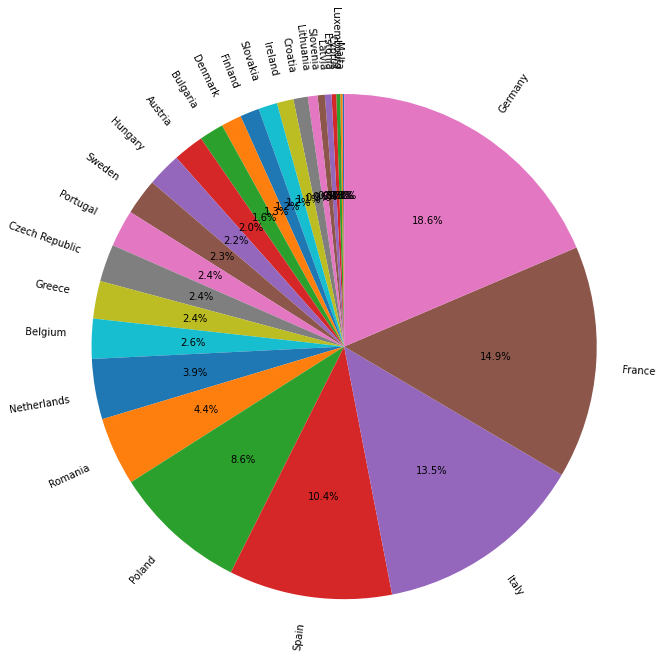

In [57]:
import matplotlib.pyplot as plt
r3.df['Population_P1082'] = r3.df['Population_P1082'].astype(int)
pop_data = r3.df.sort_values(by=['Population_P1082'])
labels = pop_data['Country_P150Label']
sizes = pop_data['Population_P1082']

fig1, ax1 = plt.subplots(figsize=[10,10])
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', rotatelabels=True,
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [29]:
def adjustedGDP(gdp: WikiDataProperty(['P2131', 'P2132']), timestamp: WikiDataProperty(['P585'])):
      inflationIndex = pd.read_csv('test_data/inflation_index.csv')
      base = inflationIndex.iloc[-1]['Index']
      timestamp = timestamp[:10]
      inflationIndex.set_index('Date',inplace=True)
      if timestamp in inflationIndex.index:
          return math.floor(float(gdp) / inflationIndex.loc[timestamp]['Index'] * base)
      return math.floor(float(gdp))

usgdp = createRelation('Q30') # Q30 - 'United States of America'
usgdp.extend('P2131', False, 'GDP', colVerbose=True,rowVerbose=True) # P2131 - 'nominal GDP'
usgdp.query()
usgdp.extendWithFunction(['GDP_P2131','GDP_point_in_time_P2131_P585'], adjustedGDP, 'adjustedGDP_P2131') # base 2014
usgdp.df

,Entity ID,GDP_P2131,GDP_rank_P2131_rank,GDP_point_in_time_P2131_P585,GDP_ref_P2131_P813,GDP_ref_P2131_P248,GDP_ref_P2131_P275,GDP_ref_P2131_P854,Basic ID,adjustedGDP_P2131
0,http://www.wikidata.org/entity/Q30,16155255000000,http://wikiba.se/ontology#NormalRank,2012-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,16672060655946
1,http://www.wikidata.org/entity/Q30,1167770000000,http://wikiba.se/ontology#NormalRank,1971-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,6863318776884
2,http://www.wikidata.org/entity/Q30,16691517000000,http://wikiba.se/ontology#NormalRank,2013-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,16955067268421
3,http://www.wikidata.org/entity/Q30,4590155000000,http://wikiba.se/ontology#NormalRank,1986-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,9796630446897
4,http://www.wikidata.org/entity/Q30,8100201000000,http://wikiba.se/ontology#NormalRank,1996-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,12271804515000
5,http://www.wikidata.org/entity/Q30,17427609000000,http://wikiba.se/ontology#NormalRank,2014-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,17427609000000
6,http://www.wikidata.org/entity/Q30,1282449000000,http://wikiba.se/ontology#NormalRank,1972-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,7298913388905
7,http://www.wikidata.org/entity/Q30,19390604000000,http://wikiba.se/ontology#PreferredRank,2017-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,19390604000000
8,http://www.wikidata.org/entity/Q30,2356571000000,http://wikiba.se/ontology#NormalRank,1978-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,8819834592576
9,http://www.wikidata.org/entity/Q30,14964372000000,http://wikiba.se/ontology#NormalRank,2010-01-01T00:00:00Z,2018-10-18T00:00:00Z,http://www.wikidata.org/entity/Q21540096,http://www.wikidata.org/entity/Q20007257,https://data.worldbank.org/indicator/NY.GDP.MK...,Q30,16154204178155


Text(0, 0.5, 'Adjusted GDP (Trillons of Dollars)')

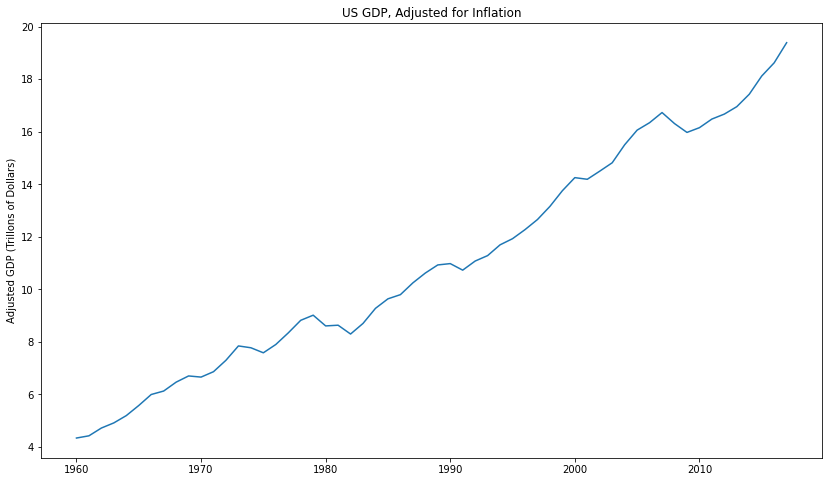

In [49]:
gdp_data = usgdp.df.sort_values(by=['GDP_point_in_time_P2131_P585'])

xvals = list(map(lambda x: int(x[:4]), gdp_data['GDP_point_in_time_P2131_P585']))
yvals = list(map(lambda x: float(x)/1000000000000, gdp_data['adjustedGDP_P2131']))

plt.figure(figsize=[14,8])
plt.plot(xvals, yvals)
plt.title("US GDP, Adjusted for Inflation")
plt.ylabel("Adjusted GDP (Trillons of Dollars)")

# National Parks

In [2]:
entity_subclass = 'national_park'
qnum = 'Q34918903' # "National Park of the United States"
r = createRelation(qnum, label=True)
r.extend('P31', True, 'entity_subclass', label=True) # extend via property P31 = is instance of

r.changeFocus('entity_subclass_P31')
r.extend('P17', False, 'Country',label=True, search="Q30") # extend via property P17 = is in country
# r.extend('P131', False, 'State', label=True)
r.extend('P625', False, 'Lon_Lat')
r.extend('P571', False, 'Inception')
r.query()

print('There are %s instances of %s in the US.' % (str(len(r.df)), entity_subclass))

There are 77 instances of national_park in the US.


In [3]:
r.df

,Entity ID,entity_subclass_P31,entity_subclass_P31Label,Country_P17,Country_P17Label,Lon_Lat_P625,Inception_P571,Basic ID
0,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q836264,Kobuk Valley National Park,http://www.wikidata.org/entity/Q30,United States of America,Point(-159.283333333 67.55),1980-12-02T00:00:00Z,Q34918903
1,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q205952,Hawaiʻi Volcanoes National Park,http://www.wikidata.org/entity/Q30,United States of America,Point(-155.12361 19.40083),1916-01-01T00:00:00Z,Q34918903
2,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q841503,Kenai Fjords National Park,http://www.wikidata.org/entity/Q30,United States of America,Point(-150.10857 59.81571),1980-01-01T00:00:00Z,Q34918903
3,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q866080,Biscayne National Park,http://www.wikidata.org/entity/Q30,United States of America,Point(-80.18096924 25.50185493),1980-06-28T00:00:00Z,Q34918903
4,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q305880,Black Canyon of the Gunnison National Park,http://www.wikidata.org/entity/Q30,United States of America,Point(-107.716666666 38.566666666),1933-03-02T00:00:00Z,Q34918903
...,...,...,...,...,...,...,...,...
72,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q605657,Gates of the Arctic National Park and Preserve,http://www.wikidata.org/entity/Q30,United States of America,Point(-153.3 67.7833),1980-01-01T00:00:00Z,Q34918903
73,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q217136,Denali National Park and Preserve,http://www.wikidata.org/entity/Q30,United States of America,Point(-150.3 63.2),1917-01-01T00:00:00Z,Q34918903
74,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q239304,Crater Lake National Park,http://www.wikidata.org/entity/Q30,United States of America,Point(-122.148055555 42.911944444),1902-01-01T00:00:00Z,Q34918903
75,http://www.wikidata.org/entity/Q34918903,http://www.wikidata.org/entity/Q129902,Capitol Reef National Park,http://www.wikidata.org/entity/Q30,United States of America,Point(-111.167 38.2),1937-08-02T00:00:00Z,Q34918903


#### Visit 20 national parks in order.

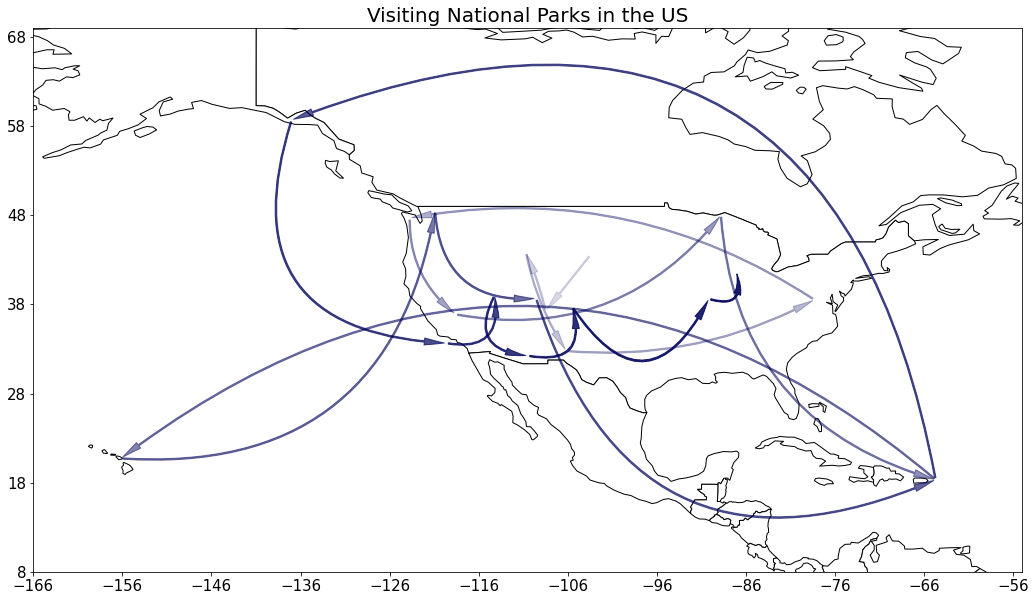

1903-01-01	Wind Cave National Park
1906-01-01	Mesa Verde National Park
1929-02-26	Grand Teton National Park
1933-01-18	White Sands National Park
1935-12-26	Shenandoah National Park
1938-06-29	Olympic National Park
1940-01-01	Kings Canyon National Park
1940-04-03	Isle Royale National Park
1956-08-02	Virgin Islands National Park
1961-07-01	Haleakalā National Park
1968-10-02	North Cascades National Park
1971-11-12	Arches National Park
1976-01-01	Virgin Islands National Park
1980-01-01	Glacier Bay National Park and Preserve
1980-01-01	Channel Islands National Park
1987-01-01	Great Basin National Park
1994-01-01	Saguaro National Park
2004-01-01	Great Sand Dunes National Park and Preserve
2018-02-22	Gateway Arch National Park


In [8]:
func_lib.arrow_map(r.df[20:40], 'Inception_P571', 'Lon_Lat_P625', 'entity_subclass_P31Label', 'Visiting National Parks in the US')